In [21]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [23]:
# Function to predict and plot forecasts for given periods
def predict_and_plot(model, periods, freq, title):
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    fig = model.plot(forecast)
    plt.title(title)
    plt.show()
    return forecast

In [25]:
# Function to display predictions for given periods
def display_predictions(forecast, periods, description):
    print(f"\nPredicted values for the next {periods} {description}:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods))

In [27]:
# Function to evaluate the model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}, R²: {r2:.3f}")

22:58:35 - cmdstanpy - INFO - Chain [1] start processing
22:59:20 - cmdstanpy - INFO - Chain [1] done processing


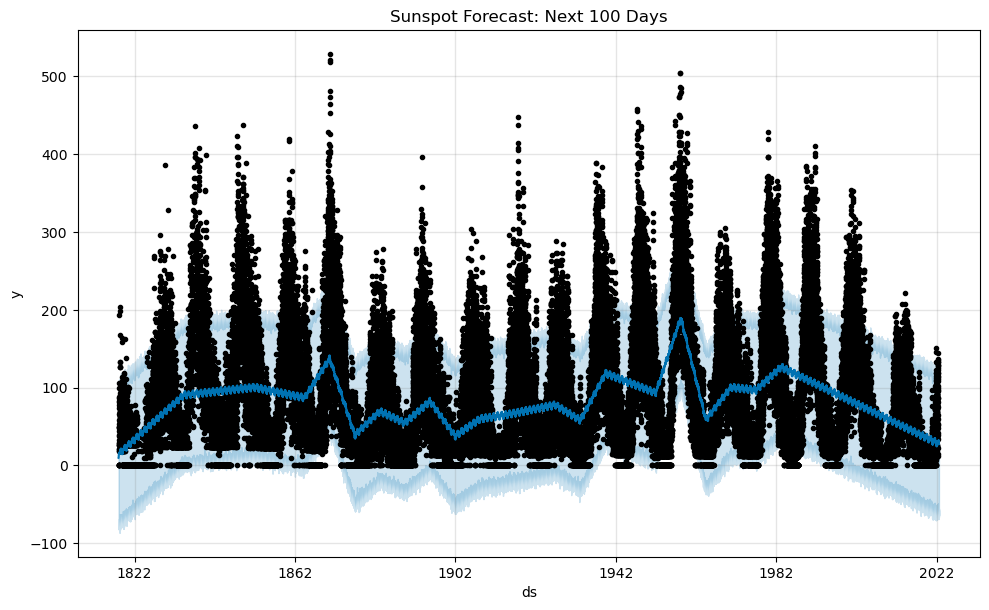

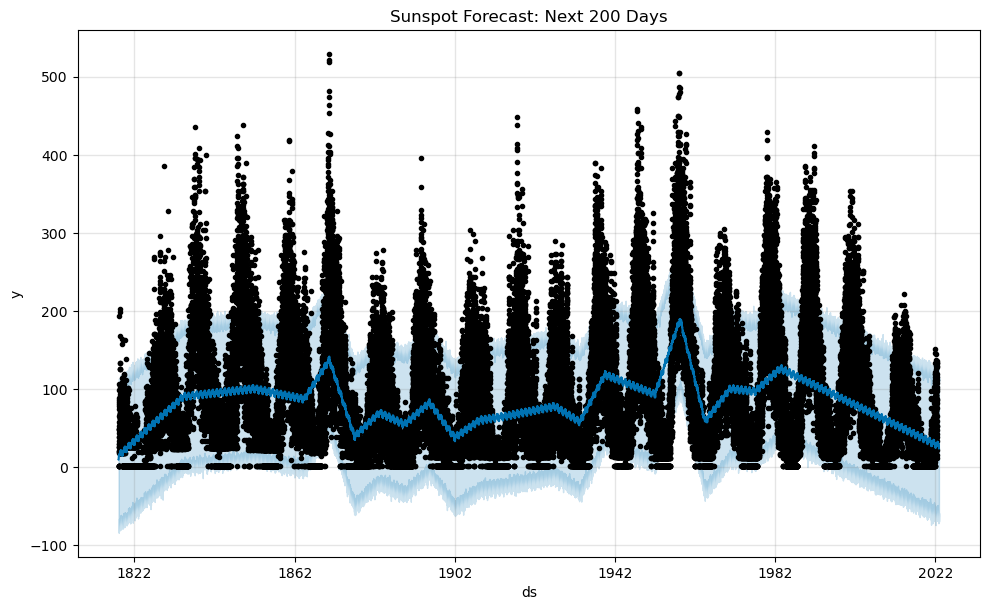

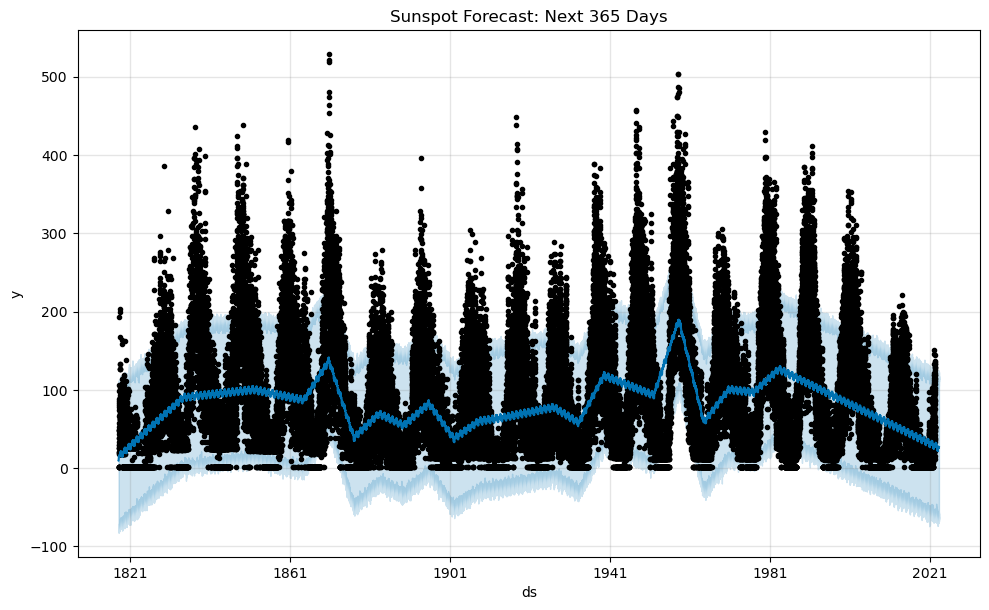


Predicted values for the next 100 days:
              ds       yhat  yhat_lower  yhat_upper
71383 2022-05-01  29.477436  -63.581670  124.523743
71384 2022-05-02  29.803355  -62.859624  113.778846
71385 2022-05-03  29.859554  -51.976700  117.877096
71386 2022-05-04  30.089978  -53.923118  111.668356
71387 2022-05-05  30.108291  -59.114573  119.416231
...          ...        ...         ...         ...
71478 2022-08-04  28.521581  -65.186331  117.783594
71479 2022-08-05  28.472048  -55.405024  114.669790
71480 2022-08-06  28.904129  -58.443807  116.569440
71481 2022-08-07  29.130857  -64.056579  113.027038
71482 2022-08-08  29.634065  -61.424163  113.286630

[100 rows x 4 columns]

Predicted values for the next 200 days:
              ds       yhat  yhat_lower  yhat_upper
71383 2022-05-01  29.477436  -54.182984  117.315765
71384 2022-05-02  29.803355  -57.859334  112.091763
71385 2022-05-03  29.859554  -54.321621  120.957393
71386 2022-05-04  30.089978  -63.612666  121.874451
71387 2022

In [29]:
# ---- Daily Prediction ----
# Load and preprocess the daily data
file_daily = "SN_d_tot_V2.0.csv"
df_daily = pd.read_csv(file_daily, sep=';', header=None)
df_daily.columns = ['Year', 'Month', 'Day', 'Fraction_Year', 'Sunspot_Number', 'Std_Dev', 'Observations', 'Indicator']
df_daily = df_daily.loc[df_daily["Sunspot_Number"] != -1]

df_daily['ds'] = pd.to_datetime(df_daily[['Year', 'Month', 'Day']])
df_daily['y'] = df_daily['Sunspot_Number']
df_daily['y'] += 1  # Handle zeros
df_daily = df_daily.dropna()

# Train Prophet model for daily data
daily_model = Prophet()
daily_model.fit(df_daily)

# Predict and plot for 100, 200, and 365 days
forecast_daily_100 = predict_and_plot(daily_model, 100, 'D', "Sunspot Forecast: Next 100 Days")
forecast_daily_200 = predict_and_plot(daily_model, 200, 'D', "Sunspot Forecast: Next 200 Days")
forecast_daily_365 = predict_and_plot(daily_model, 365, 'D', "Sunspot Forecast: Next 365 Days")

# Display predictions for daily data
display_predictions(forecast_daily_100, 100, "days")
display_predictions(forecast_daily_200, 200, "days")
display_predictions(forecast_daily_365, 365, "days")


23:00:04 - cmdstanpy - INFO - Chain [1] start processing
23:00:04 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


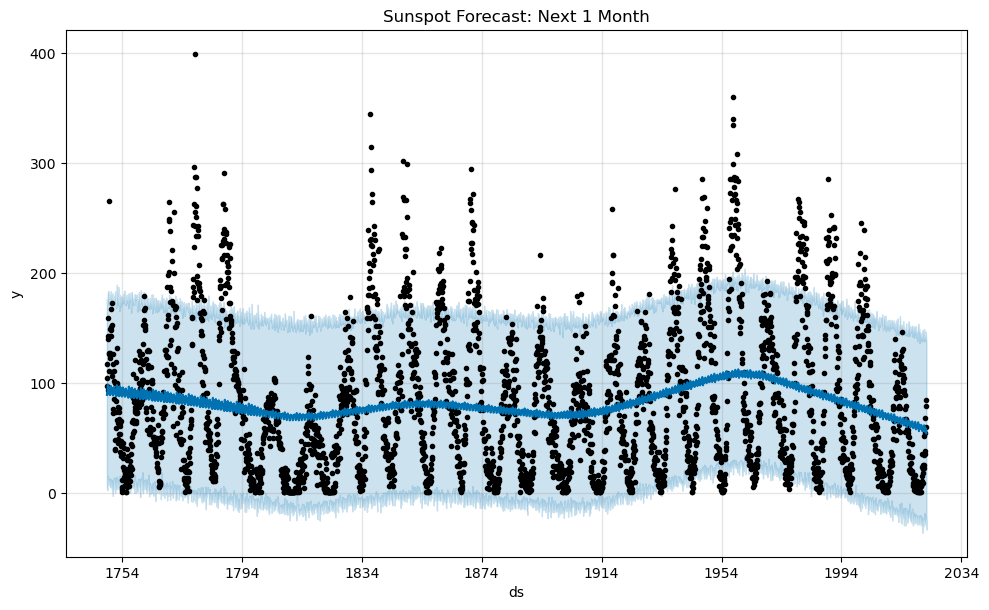

C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


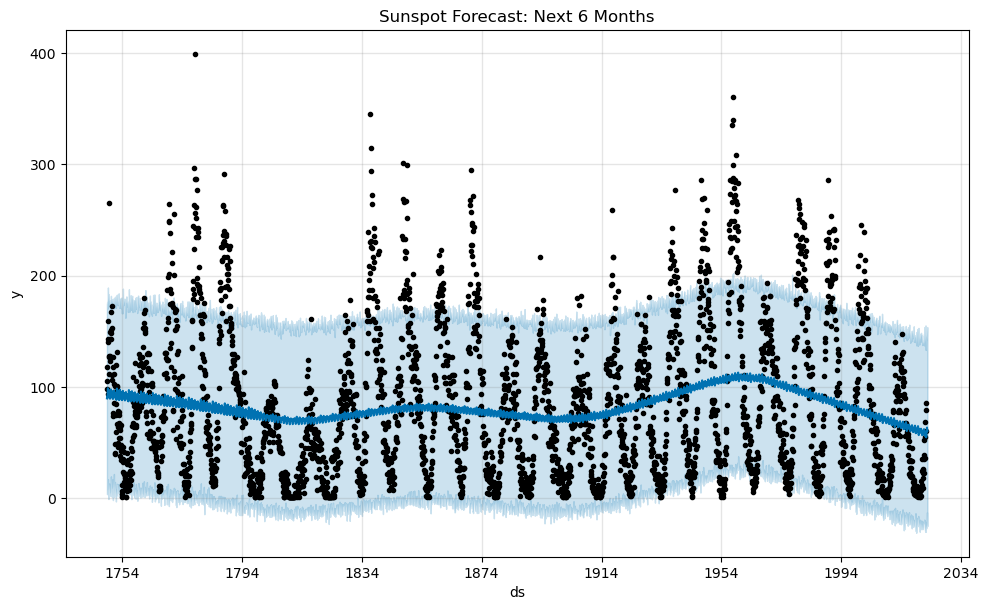

C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


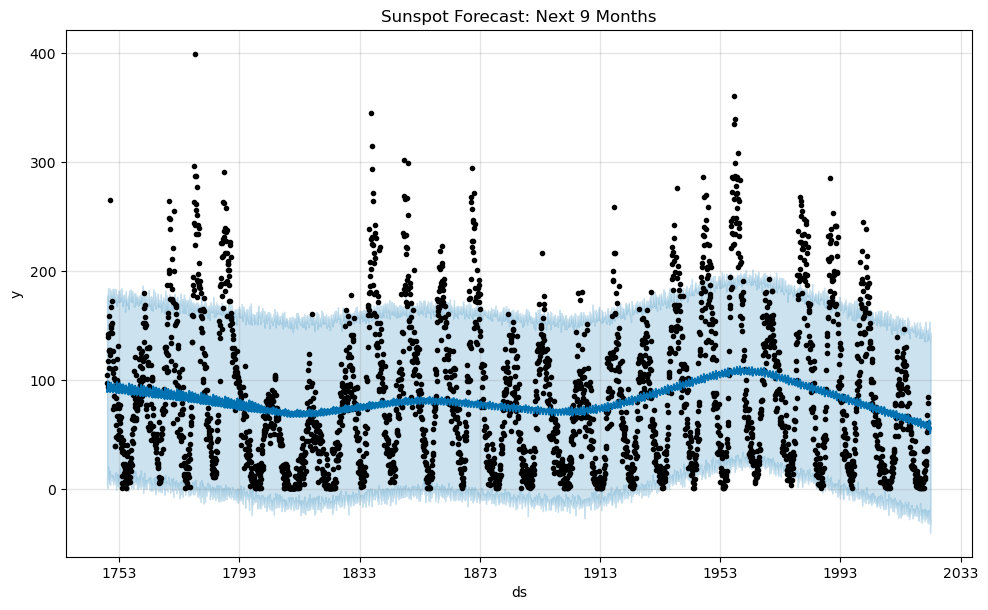


Predicted values for the next 1 month:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  54.601459  -32.730896   137.68249

Predicted values for the next 6 months:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  54.601459  -27.185250  146.808045
3281 2022-05-31  58.853375  -24.690279  144.946552
3282 2022-06-30  60.334169  -22.993905  142.549180
3283 2022-07-31  63.352386  -12.755523  149.112511
3284 2022-08-31  60.418601  -24.269149  153.704148
3285 2022-09-30  60.241669  -25.060057  146.928130

Predicted values for the next 9 months:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  54.601459  -31.135755  138.064852
3281 2022-05-31  58.853375  -25.995398  141.805435
3282 2022-06-30  60.334169  -24.766669  142.260249
3283 2022-07-31  63.352386  -21.131663  153.561075
3284 2022-08-31  60.418601  -18.638446  148.629434
3285 2022-09-30  60.241669  -20.534679  141.585199
3286 2022-10-31  51.552162  -39.673944  135.666191
3287 2022-1

In [31]:
# ---- Monthly Prediction ----
# Load and preprocess the monthly data
file_monthly = "SN_m_tot_V2.0.csv"
df_monthly = pd.read_csv(file_monthly, sep=';', header=None)
df_monthly.columns = ['Year', 'Month', 'Fraction_Year', 'Sunspot_Number', 'Std_Dev', 'Observations', 'Indicator']
df_monthly = df_monthly.loc[df_monthly["Sunspot_Number"] != -1]

df_monthly['ds'] = pd.to_datetime(df_monthly[['Year', 'Month']].assign(Day=1))
df_monthly['y'] = df_monthly['Sunspot_Number']
df_monthly['y'] += 1  # Handle zeros
df_monthly = df_monthly.dropna()

# Train Prophet model for monthly data
monthly_model = Prophet()
monthly_model.fit(df_monthly)

# Predict and plot for 1, 6, and 9 months
forecast_monthly_1 = predict_and_plot(monthly_model, 1, 'M', "Sunspot Forecast: Next 1 Month")
forecast_monthly_6 = predict_and_plot(monthly_model, 6, 'M', "Sunspot Forecast: Next 6 Months")
forecast_monthly_9 = predict_and_plot(monthly_model, 9, 'M', "Sunspot Forecast: Next 9 Months")

# Display predictions for monthly data
display_predictions(forecast_monthly_1, 1, "month")
display_predictions(forecast_monthly_6, 6, "months")
display_predictions(forecast_monthly_9, 9, "months")


23:00:19 - cmdstanpy - INFO - Chain [1] start processing
23:00:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


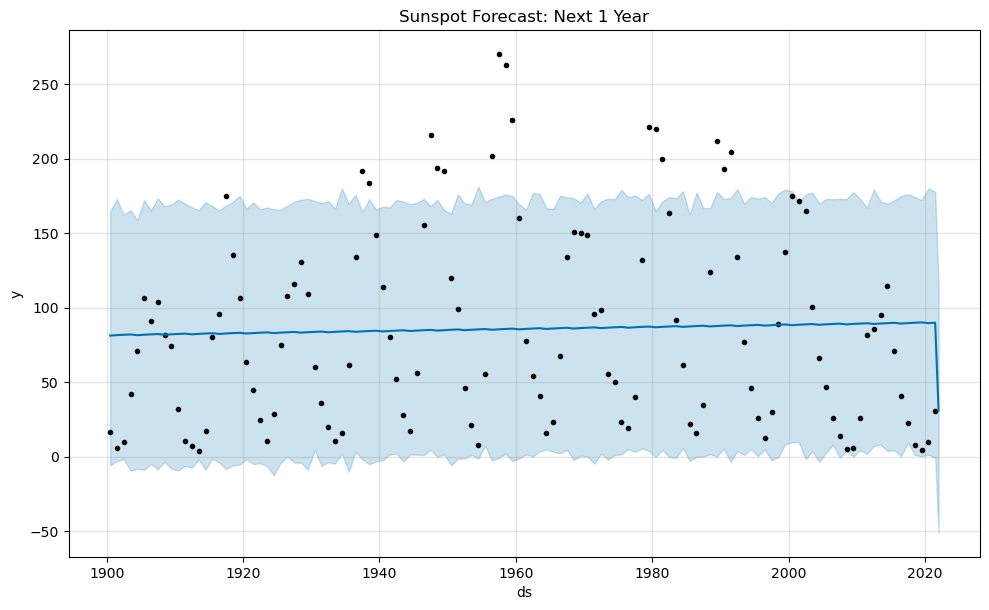

C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


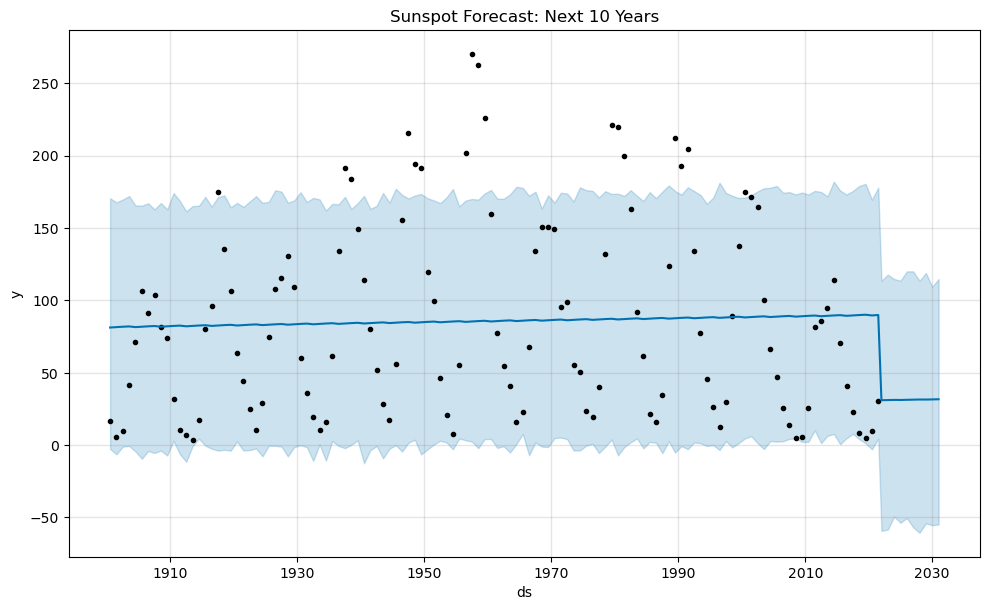

C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


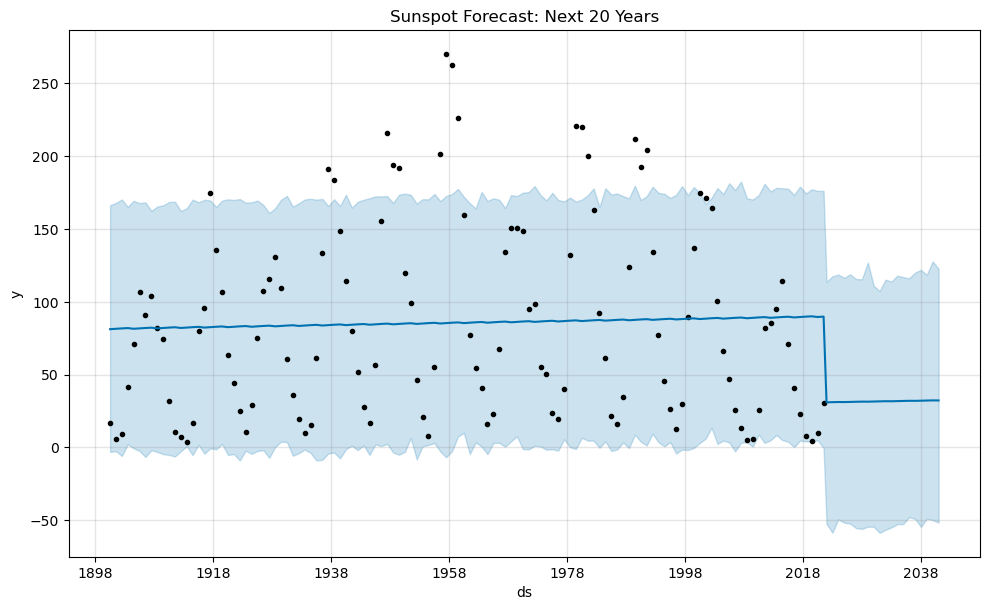


Predicted values for the next 1 year:
            ds     yhat  yhat_lower  yhat_upper
122 2021-12-31  30.9787  -51.177326  115.644567

Predicted values for the next 10 years:
            ds       yhat  yhat_lower  yhat_upper
122 2021-12-31  30.978700  -59.284765  113.539067
123 2022-12-31  31.083368  -58.491705  117.788204
124 2023-12-31  31.182101  -49.424012  114.724951
125 2024-12-31  31.146789  -53.741607  113.601850
126 2025-12-31  31.257323  -50.441717  120.040941
127 2026-12-31  31.361991  -56.894570  120.020479
128 2027-12-31  31.460724  -60.647715  113.510641
129 2028-12-31  31.425412  -54.120761  118.940380
130 2029-12-31  31.535946  -55.421882  109.377293
131 2030-12-31  31.640614  -54.870041  114.723514

Predicted values for the next 20 years:
            ds       yhat  yhat_lower  yhat_upper
122 2021-12-31  30.978700  -52.515461  113.816051
123 2022-12-31  31.083368  -58.589959  117.554669
124 2023-12-31  31.182101  -49.409415  118.710577
125 2024-12-31  31.146789  -51.70

In [33]:
# ---- Yearly Prediction ----
# Load and preprocess the yearly data
file_yearly = "SN_y_tot_V2.0.csv"
df_yearly = pd.read_csv(file_yearly, sep=';', header=None)
df_yearly.columns = ['Fraction_Year', 'Sunspot_Number', 'Std_Dev', 'Observations', 'Indicator']
df_yearly = df_yearly.loc[df_yearly["Sunspot_Number"] != -1]

# Convert fractional year to Date
def fraction_year_cnv(fractional_year):
    year = int(fractional_year)
    fraction = fractional_year - year
    month = int(fraction * 12) + 1
    day = int((fraction * 12 - (month - 1)) * 30) + 1
    return pd.Timestamp(year=year, month=month, day=day)

df_yearly['ds'] = df_yearly['Fraction_Year'].apply(fraction_year_cnv)
df_yearly['y'] = df_yearly['Sunspot_Number']
df_yearly['y'] += 1  # Handle zeros
df_yearly = df_yearly.dropna()
df_yearly = df_yearly[df_yearly['ds'] >= '1900-01-01']

# Train Prophet model for yearly data
yearly_model = Prophet()
yearly_model.fit(df_yearly)

# Predict and plot for 1, 10, and 20 years
forecast_yearly_1 = predict_and_plot(yearly_model, 1, 'Y', "Sunspot Forecast: Next 1 Year")
forecast_yearly_10 = predict_and_plot(yearly_model, 10, 'Y', "Sunspot Forecast: Next 10 Years")
forecast_yearly_20 = predict_and_plot(yearly_model, 20, 'Y', "Sunspot Forecast: Next 20 Years")

# Display predictions for yearly data
display_predictions(forecast_yearly_1, 1, "year")
display_predictions(forecast_yearly_10, 10, "years")
display_predictions(forecast_yearly_20, 20, "years")


In [35]:
# ---- Hyperparameter Tuning and Custom Seasonality ----
# Tune models for daily, monthly, and yearly data by adding custom seasonality

def tune_and_predict_with_seasonality(df, periods, freq, title, cycle_period, model_name):
    model_tuned = Prophet(
        growth='linear',
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10,
        seasonality_mode='multiplicative'
    )
    model_tuned.add_seasonality(name='solar_cycle', period=cycle_period, fourier_order=5)
    model_tuned.fit(df)
    forecast_tuned = predict_and_plot(model_tuned, periods, freq, title)
    display_predictions(forecast_tuned, periods, f"{model_name} {title}")
    return forecast_tuned


23:00:35 - cmdstanpy - INFO - Chain [1] start processing
23:01:47 - cmdstanpy - INFO - Chain [1] done processing


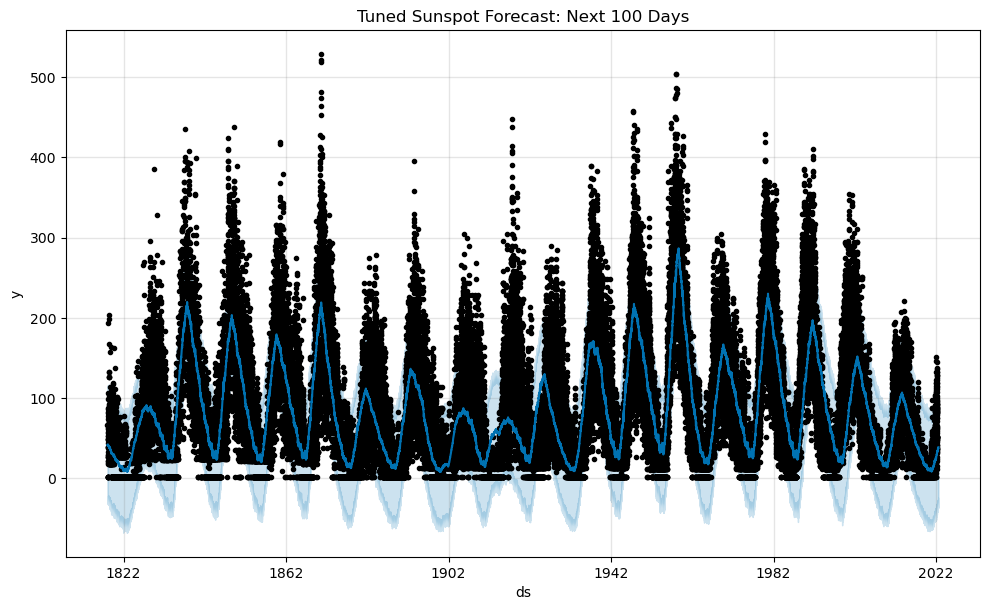

23:01:56 - cmdstanpy - INFO - Chain [1] start processing



Predicted values for the next 100 Daily Tuned Sunspot Forecast: Next 100 Days:
              ds       yhat  yhat_lower  yhat_upper
71383 2022-05-01  33.077479  -36.067052  101.014234
71384 2022-05-02  33.324550  -35.306750  102.722299
71385 2022-05-03  33.407815  -37.237814   99.953830
71386 2022-05-04  33.523953  -32.627158   99.581203
71387 2022-05-05  33.748771  -37.356584  101.496092
...          ...        ...         ...         ...
71478 2022-08-04  37.938479  -28.309271  105.736452
71479 2022-08-05  37.918916  -31.441162  107.869078
71480 2022-08-06  38.168984  -30.717834  104.756443
71481 2022-08-07  38.313379  -28.686204  107.175745
71482 2022-08-08  38.644792  -30.356781  110.505000

[100 rows x 4 columns]


23:01:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


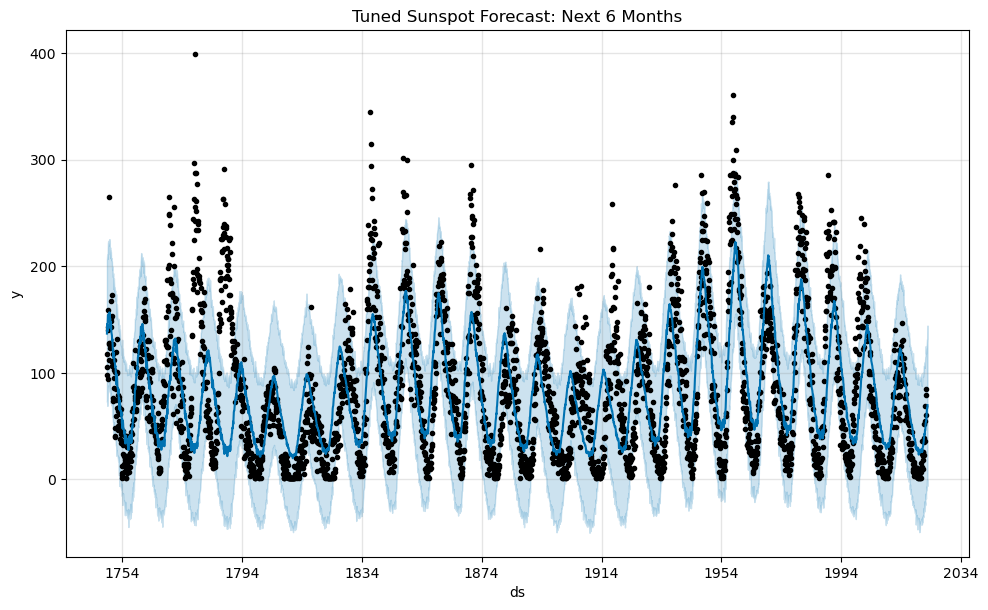

23:01:57 - cmdstanpy - INFO - Chain [1] start processing
23:01:57 - cmdstanpy - INFO - Chain [1] done processing



Predicted values for the next 6 Monthly Tuned Sunspot Forecast: Next 6 Months:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  55.184758   -9.027268  123.366879
3281 2022-05-31  57.927522   -6.860139  123.009238
3282 2022-06-30  62.723596  -10.277989  126.330583
3283 2022-07-31  66.564050   -0.496259  130.883608
3284 2022-08-31  66.288449   -0.558296  132.541441
3285 2022-09-30  69.527733   -6.152379  144.279486


C:\Users\All\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


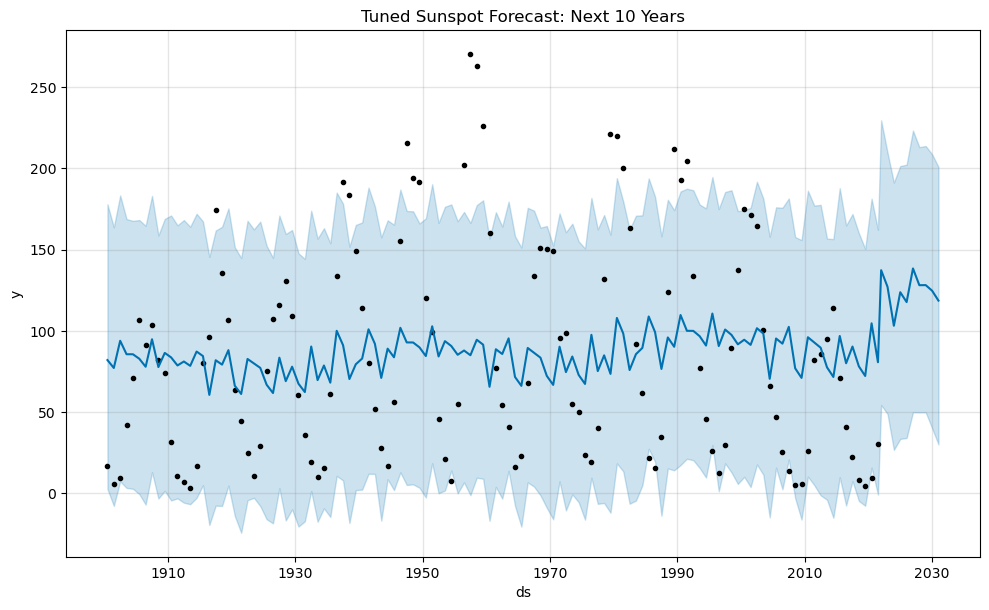


Predicted values for the next 10 Yearly Tuned Sunspot Forecast: Next 10 Years:
            ds        yhat  yhat_lower  yhat_upper
122 2021-12-31  137.311009   54.391294  229.485203
123 2022-12-31  127.104124   48.915985  209.634822
124 2023-12-31  103.127242   26.786141  191.171739
125 2024-12-31  123.751985   33.542786  201.340066
126 2025-12-31  117.692152   34.115176  202.196516
127 2026-12-31  138.362923   49.978049  223.195195
128 2027-12-31  128.078621   49.859909  212.984635
129 2028-12-31  128.121365   49.897233  213.671603
130 2029-12-31  124.693419   40.133908  208.611239
131 2030-12-31  118.588280   30.151206  200.856317


In [37]:
# Apply tuning to daily, monthly, and yearly models
forecast_daily_tuned = tune_and_predict_with_seasonality(df_daily, 100, 'D', "Tuned Sunspot Forecast: Next 100 Days", 365.25 * 11, "Daily")
forecast_monthly_tuned = tune_and_predict_with_seasonality(df_monthly, 6, 'M', "Tuned Sunspot Forecast: Next 6 Months", 365.25 * 11, "Monthly")
forecast_yearly_tuned = tune_and_predict_with_seasonality(df_yearly, 10, 'Y', "Tuned Sunspot Forecast: Next 10 Years", 11, "Yearly")


In [39]:
# Evaluate the performance of tuned models
evaluate_model(df_daily['y'], forecast_daily_tuned['yhat'][:len(df_daily)])
evaluate_model(df_monthly['y'], forecast_monthly_tuned['yhat'][:len(df_monthly)])
evaluate_model(df_yearly['y'], forecast_yearly_tuned['yhat'][:len(df_yearly)])


MAE: 40.34, MAPE: 6.17, R²: 0.519
MAE: 38.97, MAPE: 2.42, R²: 0.397
MAE: 55.03, MAPE: 2.11, R²: 0.025
